## Simple linear Regression 


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading data set 

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Perform basic quality checks


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
df.duplicated().sum()

0

PROFIT ~ RND

PROFIT is target feature (which i am trying to predict based on RND budet of startup)

PROFIT_pred = B0 + B1*RND

## separate X and Y from the dataframe

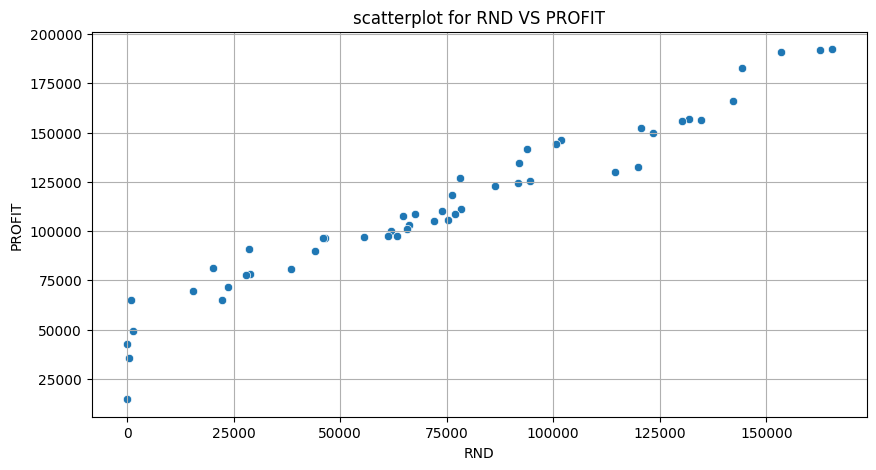

In [8]:
# visulazie RND vs PROFIT 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='RND', y = 'PROFIT')
plt.title('scatterplot for RND VS PROFIT')
plt.grid()
plt.show()


## Separate X and Y terms

In [16]:
X = df[['RND']]
Y = df[['PROFIT']]

In [19]:
X

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34
5,131876.90
6,134615.46
7,130298.13
8,120542.52
9,123334.88


In [15]:
Y

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


# Create Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [22]:
B1 = model.coef_
B1 


array([[0.85429137]])

In [23]:
B0 = model.intercept_
B0 


array([49032.89914125])

PROFIT_pred = 49032090+0.8543*RND

Evalute the model

In [24]:
r2 = model.score(X,Y)
r2

0.9465353160804393

# As i am getting R2 score of 0.9465 
## the model is a good model as R2 = 0.8

# Visulaize the fitted straight line

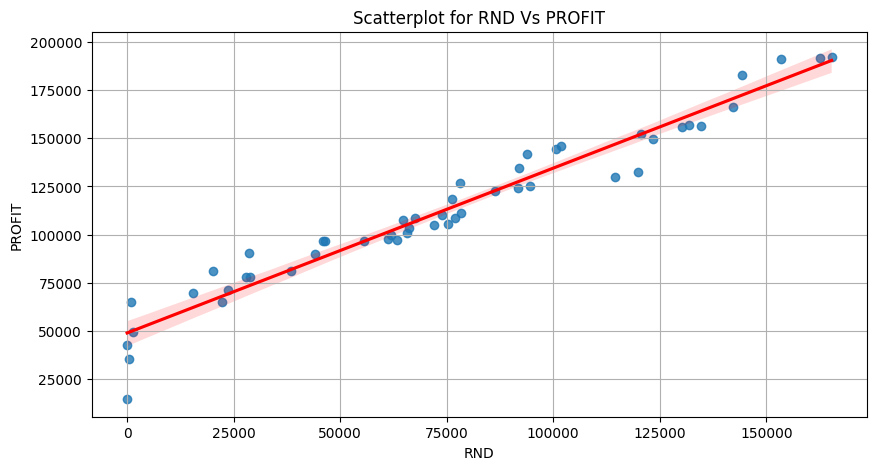

In [26]:
# Visulaize RND Vs PROFIT
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.regplot(data=df, x = 'RND', y = 'PROFIT', line_kws={'color':'red'})
plt.title('Scatterplot for RND Vs PROFIT')
plt.grid()
plt.show()

## Estimate the predicated values by the model

In [27]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [28]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Estimate other metrics  MSE,RMSE.MAE,MAPR,R2

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error,r2_score

In [30]:
mse = mean_squared_error(Y , ypred)
mse

85120931.32706906

In [31]:
rmse = mse**(1/2)
rmse

9226.100548285232

In [32]:
mape = mean_absolute_percentage_error(Y , ypred)
mape

0.11070141081984847

In [33]:
r2 = r2_score(Y, ypred)
r2

0.9465353160804393

### Above model has good r2 score of 0.9456 which is more than 0.8 


### Predicting PROFIT for given RND value

In [34]:
rnd = [[150000]]
model.predict(rnd)

array([[177176.60478207]])

### PROFIT_pred = 49032.90+0.8543*RND

### Predicting multiple values

In [38]:
rnds = [[50000],[120000],[150000],[200000],[230000]]
profits = model.predict(rnds)
profits

array([[ 91747.46768819],
       [151547.86365391],
       [177176.60478207],
       [219891.17332901],
       [245519.91445718]])

## 1. RND increase by 1000 , profit increaes by 854.3
## 2. RND and PROFIT have strong linear relationship because of good r2 score of 0.9456

### Creating linear regression  FOR for ADMIN vs PROFIT 

### PROFIT ~ ADMIN 

#### PROFIT is target feature (which i am trying to predict based on ADMIN budget of startup)


#### PROFIT = B0 + B1 * ADMIN

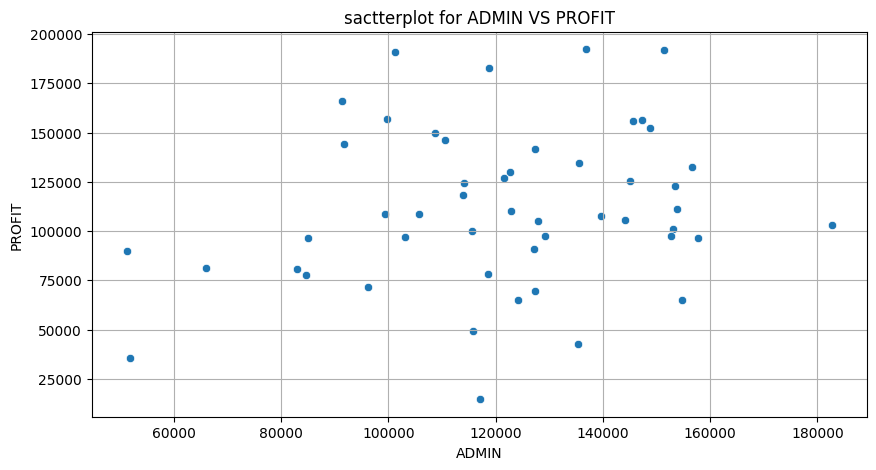

In [39]:
# visulaize PROFIT VS ADMIN 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,5))
sns.scatterplot(data = df, x = 'ADMIN', y = 'PROFIT')
plt.title ('sactterplot for ADMIN VS PROFIT')
plt.grid()
plt.show()

### separate X and Y terms

In [40]:
X1 = df[['ADMIN']]
Y1 = df[['PROFIT']]

In [41]:
X1

,ADMIN
0,136897.80
1,151377.59
2,101145.55
3,118671.85
4,91391.77
5,99814.71
6,147198.87
7,145530.06
8,148718.95
9,108679.17


In [42]:
Y1

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


## create linear regression model 

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1,Y1)

LinearRegression()

In [45]:
B1 = model.coef_
B1

array([[0.2887492]])

In [46]:
B0 = model.intercept_
B0

array([76974.47130542])

####  Evaluting model

In [48]:
r2 = model.score(X1,Y1)
r2

0.04028714077757223

## As i am getting r2 score of 0.0402 is very less than 0.8 so the model is not good model or we can say that ADMIN and PROFIT have weak linear regression 

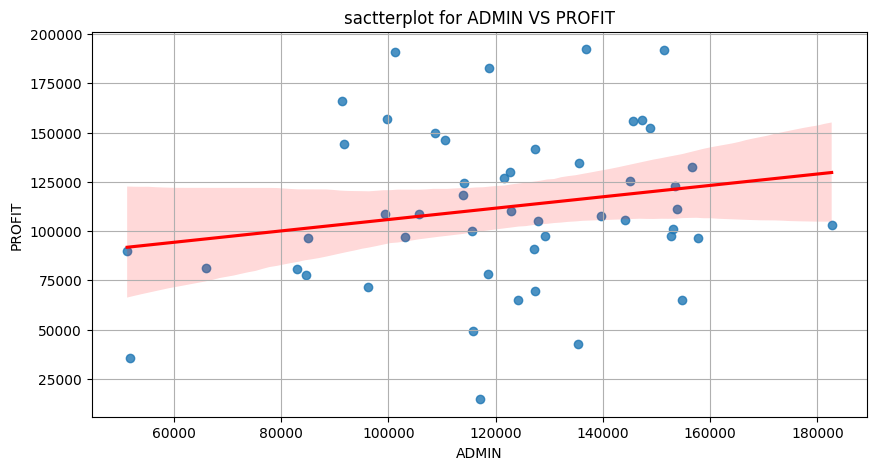

In [50]:
# visulaize PROFIT VS ADMIN 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,5))
sns.regplot(data = df, x = 'ADMIN', y = 'PROFIT', line_kws={'color':'red'})
plt.title ('sactterplot for ADMIN VS PROFIT')
plt.grid()
plt.show()